# **Shor's Algorithm**
***

In this session, we will cover the famed Shor's Factoring Algorithm, as well as its implications. At its core, we shall see that Shor's Algorithm is really a
quantum algorithm for period finding, which cleverly allows for the factoring of large numbers. Due to its complexity, this algorithm will require us to explore
numerous mathematical side topics in order to understand all of the moving parts that make up Shor's.

In order to make sure that all cells of code run properly throughout this lesson, please run the following cell of code below:

In [56]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute 
from qiskit.visualization import plot_histogram, circuit_drawer
import random
import math as m 
import numpy as np
import scipy as sci

S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

In [57]:
def Binary(N,total,LSB):
  '''
  Input: N (integer) total (integer) LSB (string)
  Returns the base-2 binary equivilant of N according to left or right least significant bit notation
  '''
  qubits = int(m.log(total, 2))
  b_num = np.zeros(qubits)
  for i in np.arange(qubits):
    if( N/((2)**(qubits-i-1)) >= 1):
      if (LSB == 'R'):
        b_num[i] = 1
      if(LSB== 'L'):
        b_num[int(qubits-(i+1))] = 1
      N = N - 2**(qubits-i-1)
  B = []
  for j in np.arange(len(b_num)): 
    B.append(int(b_num[j]))
  return B

In [58]:
def Wavefunction( obj, *args, **kwargs):
  '''
  Displays the wavefunction of the quantum system
  '''
  if(type(obj) == QuantumCircuit ):
    statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector() 
  if(type(obj) == np.ndarray):
    statevec = obj
  sys = False
  NL = False
  dec = 5
  if 'precision' in kwargs:
    dec = int(kwargs['precision'] )  
  if 'column' in kwargs:  
    NL = kwargs['column']
  if 'systems' in kwargs:
    systems=kwargs['systems']
    sys = True
    last_sys= int(len(systems)-1)
    show_systems = []
    for s_chk in np.arange(len(systems)): 
      if( type(systems [s_chk])!=int ):
        raise Exception('systems must be an array of all integers')
    if 'show_systems' in kwargs: 
      show_systems = kwargs['show_systems']
      if(len(systems)!=len (show_systems) ):
        raise Exception('systems and show_systems need to be arrays of equal length')
      for ls in np.arange(len(show_systems)): 
        if((show_systems [ ls]!=True) and (show_systems [ ls] !=False)): 
          raise Exception('show_systems must be an array of Truth Values') 
        if(show_systems [ ls] ==True): 
          last_sys= int(ls)

    else:
      for ss in np.arange(len(systems)): 
        show_systems.append(True)
  wavefunction = ''
  qubits = int(m.log(len(np.asarray(statevec)),2)) 
  for i in np.arange( int(len(np.asarray(statevec))) ): 
    value = round(statevec[int(i)].real, dec) + round(statevec[int(i)].imag, dec) * 1j
    if( (value.real!=0) or (value.imag!=0)): 
      state= list(Binary(int(i), int(2**qubits),'L'))
      state_str = ''
      if( sys == True ):    #Systems and Show Systems
        k = 0 
        for s in np.arange(len(systems)):
          if(show_systems [s]==True):
            if(int(s)!=last_sys):
              state.insert(int(k+systems [s]), '>|' ) 
              k = int(k+systems[s]+1)
            else:
              k = int(k+systems[s])
          else:
            for s2 in np.arange(systems [s]): 
              del state[int(k)]
      for j in np.arange(len(state)):
        if(type(state[j])!=str):
          state_str = state_str+str(int(state[j]))
        else:
          state_str = state_str+state[j]
      if ((value.real!=0) and (value.imag!=0)):
        if( value.imag> 0):
          wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
        else:
          wavefunction = wavefunction + str(value.real) +'' + str(value.imag) + 'j |' + state_str + '>    '
      if( (value.real!=0) and (value.imag==0)): 
        wavefunction = wavefunction +str(value.real)+' |'+state_str +'>     '
      if((value.real==0) and (value.imag!=0)): 
        wavefunction = wavefunction +str(value.imag)+'j |'+state_str+ '>     '
      if (NL):
        wavefunction = wavefunction + '\n'
  print(wavefunction)


In [59]:
def GCD(a, b):
  '''
  Input: a (integer), b (integer)
  Computes the greatest common denominator between a and b using an inefficient exhasutive search
  '''
  gcd = 0
  if(a > b):
    num1 = a
    num2 = b
  elif(b > a):
    num1 = b
    num2 = a
  elif(a == b):
    gcd = a
  while( gcd == 0 ):
    i = 1
    while( num1 >= num2*i ):
      i = i + 1
    if( num1 == num2*(i-1) ):
      gcd = num2
    else:
      r = num1 - num2*(i-1)
      num1 = num2
      num2 = r
  return gcd

# **Shor and RSA Encryption**
***

When Peter Shor published his algorithm for factoring in 1995
, it ignited the field of quantum computer science, and is still a large motivator for many of
today's leading quantum computing efforts. And yet even after two decades, we still aren't anywhere close to being able to realize Shor's Algorithm in any
practical sense. And if we're being honest, we're probably a couple of years away still. So how is it that one factoring algorithm changed the course of
computer science so drastically? The answer: because the realization of no other quantum algorithm would be as globally impactful as Shor's. So much so,
that many see the realization of Shor's Algorithm as a venture worth pursuing regardless of how many years it will take. And the reason for that, is security.

In 1978, Ron Rivest, Adi Shamir, and Leonard Adleman were the first to publicly describe an algorithm for how to encrypt and decrypt information in a novel
manner. Their algorithm describes a process for encryption which allows for one-way transmission of information with high security. This encryption
scheme, now referred to as RSA after the founders, is the most widely used encryption method in modern technology. Thus, because this RSA cryptosystem
is so abundantly used, it would be a natural alarming reaction if someone were to come along and claim they had a way to crack the encryption. Without
trying to sound overly dramatic, that is essentially what Peter Shor did when he came up with his algorithm. And as we already mentioned, that's why it
sparked tremendous interest into the field of quantum computing. Shor showed that through the use of a fully functioning quantum computer, one could crack
RSA encryption exponentially faster than any classical means.



# **Simple Example of RSA**
***

Now that our brief history detour is over, let's look at the way in which RSA encryption works, and the core math element behind it. If you would like to jump
straight to the beginning of Shor's Algorithm instead, feel free to skip to the section "Overview of Shor's Algorithm". Ultimately our goal is to show why Shor's
Algorithm is a threat to the RSA scheme, and to do that we'll need to work through a simple example. The trick to encrypting messages in RSA is through
modular exponentiation:

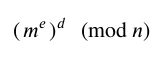

The four quantities in the equation above: m,e,d and n, all represent the components that go into the process of encrypting/ decrypting a message. Starting in order, m is the message that we want to encrypt. Because we are working with numbers, all messages must be converted to some kind of numerical
representation before being encrypted. As you shall see in the coming code example, representing a message with numbers can be as simple as 'a'= 0, 'b'= 1
, ... etc. There are of course more complex ways to encode messages with numbers, but that is not our interest with RSA here.

The next two quantities, e and d, represent the "keys" to a given RSA encryption. In combination with n , they are numbers which allow a person access to the
encrypting / decrypting of messages for a chosen RSA. The number e is known as the "public key", and is given to anyone who wishes to encrypt their
message. The number d is known as the "private key", and is only kept by those who are trusted to decrypt messages. People with e have the ability to encrypt and send messages, but only people with d have the ability to decrypt and read messages, hence the choice in variables e and d.

The last quantity, n, is a number which can be thought of as the identity of a given RSA encryption. Suppose we have two parties who wish to simultaneously
use RSA encryption, and may even accidentally choose the same e or d values. As long as the two encryptions have unique n's and both parties keep their n values secret, then even if their messages were to somehow get crossed, neither one could eavesdrop on the other. And as we already mentioned, even if
one party were to steal the n from the other, they still couldn't decrypt any messages without the private key d. 

To summarize, the security of RSA encryption is as strong as a party's ability to keep the quantities 𝑒 , 𝑑, and 𝑛 secret (𝑑 most of all). Those trusted with
encrypting and sending messages are given the quantities 𝑒 and 𝑛, while those trusted with decrypting messages are given 𝑑 and 𝑛. The full mathematical
process for encrypting and decrypting messages is a bit more cumbersome than simply picking values for 𝑛, 𝑒 , and 𝑑, so let's now take a look at an example
of the steps behind RSA encryption:

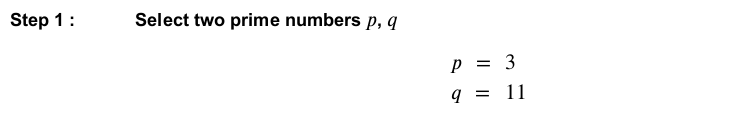

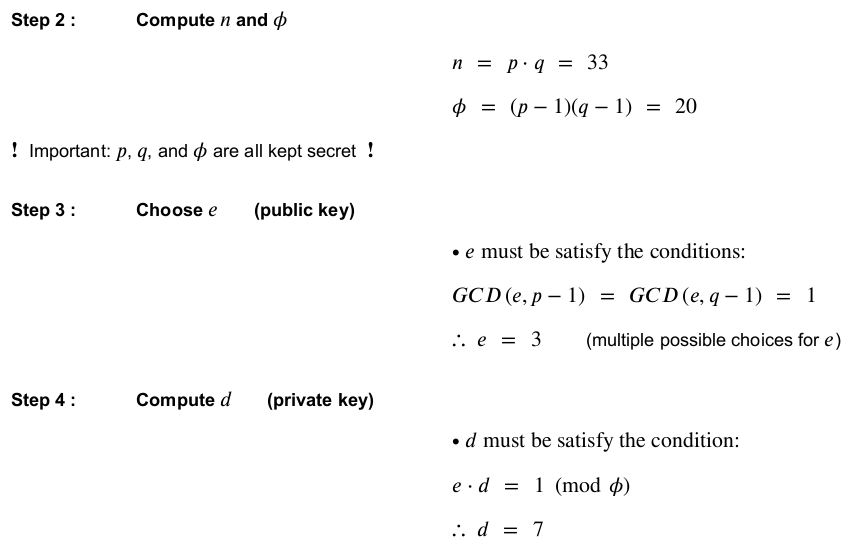

Once we have n, e, and d subject to the constraints outlined above, we are ready to encrypt and decrypt messages. For example, let's suppose that the
message we would like to send is m = 6
(remember all messages must be converted to numbers in the RSA protocol). Anyone with the public key e can
encrypt a message as follows:

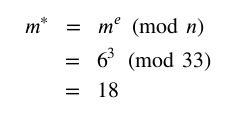

Once the message has been encrypted, only those with access to the private key 𝑑 can decrypt the message:

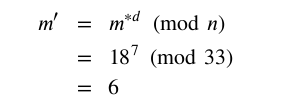

In the example above, the message 𝑚 was successfully encrypted into 𝑚∗ , and then decrypted back to 𝑚′ . And as we can see, 𝑚 = 𝑚′ indicates that our
encryption scheme was successful. Now let's see the RSA scheme in action with some code, where we can choose an arbitrary message to send:

In [60]:
def Letter_Code(x):
  '''
  Input: integer --> Converts an integer between 0 and 26 into a letter of the alphabet (26 for space)
  Input: string  --> Converts a lower case letter or space to an integer
  '''
  if( type(x) == type(1) ):
    code = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ']
    if( x < len(code) ):
      return code[x]
    else:
      return '?'
  if( type(x) == type('s') ):
    code = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25,' ':26}
    return code[x]
  #====================================


In [61]:
p = 3
q = 11
n = p*q
e = 3
d = 7
message = 'hello qubits how are you'
#------------------------------------ Encrypt the message
M = list(message)
M_rsa = []
for i in np.arange(len(M)):
  M[i] = Letter_Code(M[i])
  M_rsa.append( M[i]**e%n )
#------------------------------------ Decrypt the message
encrypted_message = ''
decrypted_message = ''
for j in np.arange(len(M_rsa)):
  encrypted_message = encrypted_message+Letter_Code( M_rsa[j] )
  decrypted_message = decrypted_message+Letter_Code( (M_rsa[j]**d)%n )
print('Encoded Message:',M,'\n\nEncrypted Message:',M_rsa,'\n\n ',encrypted_message,'\n\nDecrypted:',decrypted_message)

Encoded Message: [7, 4, 11, 11, 14, 26, 16, 20, 1, 8, 19, 18, 26, 7, 14, 22, 26, 0, 17, 4, 26, 24, 14, 20] 

Encrypted Message: [13, 31, 11, 11, 5, 20, 4, 14, 1, 17, 28, 24, 20, 13, 5, 22, 20, 0, 29, 31, 20, 30, 5, 14] 

  n?llfueobr?yunfwua??u?fo 

Decrypted: hello qubits how are you


The cell of code above is a simple demonstration of sending an encrypted message using RSA. We represent each letter of the alphabet with an integer, and
pass those values through our encryption step: $m^e$ (mod n). Both the coded and encrypted versions of the message are shown above. Then, we pass the
list of encrypted values to the decryption step: $m^{*d}$ (mod n), which is only possible by someone with the private key d. And lastly we print the message after
decryption, confirming that it does indeed match the message we sent. 

# **Cracking RSA Encryption**
***

Now suppose we want to crack a given RSA encryption, essentially eavesdropping on messages not intended for us. The easiest two pieces of information to
get hold of are the values of e and n, which we will assume were stolen off someone with only a "public" level of access. And we will also assume that
stealing d is not an option (hence why it is only given to those considered trusted), thus leaving us with the question of what can we do with e and n to crack
the encryption?


If you review the math steps above, the critical element to cracking an RSA encryption boils down to factoring n. If we are able to factor n, giving us the two prime numbers p and q, then determining d becomes a simple task for a classical computer (provided we also have e). But factoring n is no small task, as
typical RSA encryption works with n's that are of the order hundreds to thousands of digits long, which are essentially impossible to factor with classical
computing in any realistic time frame. Thus, after our lengthy discussion of RSA, we have finally come to the critical fact where our Shor's algorithm comes
into play:

❗Shor's algorithm allows for the factoring of n exponentially faster than any classical means, consequently cracking RSA encrypted messages.

Thus, the purpose for going into RSA encryption in such detail was to give a very concrete example of where a quantum factoring algorithm could be
impactful (probably the most impactful quantum algorithm to date). Because security is such an important issue, the realization of Shor's Algorithm is one of
the top priorities for the progression of quantum computers.

# **Classical Factoring - Congruence of Squares**
***

In order to appreciate the speedup that can be obtained through Shor's Algorithm, and the reason why RSA encryption is so secure, let's see how a classical
computer solves factoring problems. We will briefly discuss a technique known as 'Congruence of Squares', also known as Fermat's factorization method,
which is the basis for several integer factorization algorithms. The congruence of squares technique is based around finding two numbers X and Y that
satisfy the following:

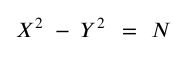

where 𝑁 is the number we are trying to factor. If we can successfully find two squares $𝑋^2$ and $𝑌^2$ that satisfy this condition, then we can factor the equation
shown above into:

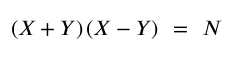

which gives us two factors of 𝑁 . For example, suppose we wanted to factor the number 72 :

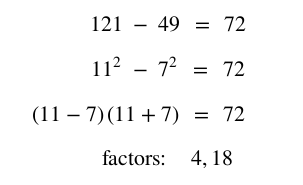

By using the squares $11^2$ and $7^2$ , we are able to find two factors of 𝑁 , which in turn require further factorization if either of them aren't prime numbers. Now,
we must point out that this factoring technique is entirely reliant on finding a combination of 𝑋 and 𝑌 that works, which in practice is very slow. Without any
intuition about what combination of 𝑋 and 𝑌 will solve your problem, we are stuck searching through all combinations exhaustively. And if we compare this to
the most basic form of factoring: exhaustively checking prime numbers for factors of 𝑁 , we have essentially just swapped out one blind search for another.

## mod N
***

For the purpose of our study of Shor's Algorithm, we will now look at a second classical factoring technique based on the Congruence of Squares. As we shall
see, this second technique will be analogous to the way in which our quantum factoring algorithm works. Similar to the difference of squares equation shown
above, this second approach begins with the following equation:

$$
X^2 ( mod N )  = Y^2
$$

Rather than looking for two perfect squares, this new technique will only require us to search for one: $X^2$. However, in searching for the right value we must
satisfy the condition that $X^2$ is equal to a second perfect square, mod N. Once we find such an $X^2$, then the real quantity of interest is the following equation:

$$
X^2 - Y^2 ( mod N )  
$$

Now, it is very important to point out that the two equations above are not equivalent! If you were to remove the (mod N) condition, then they would be, but
the presence of the (mod N) means that we must obey modulo algebra. Because they not equal, but in fact two independent equations describing our
conditions on $X^2$
and $Y^2$, we can perform some modulo arithmetic steps in order to derive a new equation:

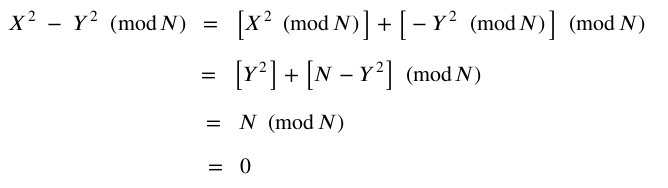

Since modulo arithmetic isn't something most people use frequently, I encourage you to review some available resources and work through the steps above
for yourself to verify the answer we've arrived at. After following the steps shown above, we now have the equation that will allow us to find factors of N:

$$
X^2 - Y^2 ( mod N )  = 0
$$

And just like our first congruence of squares technique, our next step will be to factor the left hand side of the equation:

$$
(𝑋 + 𝑌)(𝑋 − 𝑌) (mod𝑁) = 0
$$

Note that because the entire quantity $𝑋^2 + 𝑌^2$ is under (mod 𝑁 ), we can factor the left hand side of the equation as normal. In order to appreciate what this
modulo equation is telling us, let's quickly remind ourselves about the meaning behind (mod 𝑁 ). When a quantity 𝑄 is equal to 0 (mod 𝑁 ), we can say that "
𝑁 divides Q", or in other words the quantity 𝑄/𝑁 is an integer. The only way for this to be true is if all of the factors that make up 𝑁 are also in 𝑄:

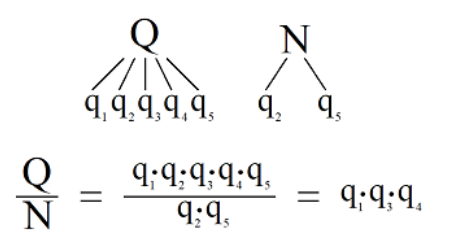

So then, if we interpret what the previous two modulo equations are telling us:
1. 𝑁 divides the quantity $𝑋^2 − 𝑌^2$
2. The quantity $𝑋^2 − 𝑌^2$ has the factors: (𝑋 + 𝑌) and (𝑋 − 𝑌)

This concludes that 𝑁 must have factors in common with (𝑋 + 𝑌) and (𝑋 − 𝑌)


The points listed above form the core idea behind this factoring technique. To summarize, by finding a value 𝑋 2 that satisfies our perfect squares modulo
condition, we are then guaranteed to have two numbers that share a common factor with 𝑁. After obtaining the two quantities (𝑋 + 𝑌 ) and (𝑋 − 𝑌 ), the
𝐺𝐶𝐷 (greatest common denominator) between these numbers and 𝑁 we will successfully solve our factoring problem.

To test this factoring technique, try putting in values for 𝑁 into the cell of code below:

In [62]:
N = 1703
S = m.ceil(m.sqrt(N))
#====================
i = 0
found = False
while( (i<10000) and (found==False) ):
  Y2 = (S+i)**2 % N
  if( ( m.sqrt(Y2) == m.floor(m.sqrt(Y2)) ) and (Y2!=1) ):
    found = True
    X = int(S+i)
    X2 = int((S+i)**2)
    Y = m.sqrt(Y2)
    Y2 = int(Y2)
  else:
    i = i + 1
if( found==True ):
  print('N: ',N)
  print('\nX^2: ',X2,'Y^2: ',Y2)
  print('\n(X+Y): ',int(X+Y),'(X-Y): ',int(X-Y))
  print('\nfactors of N: ',int(GCD(N,X+Y)),' ',int(GCD(N,X-Y)) )

N:  1703

X^2:  9604 Y^2:  1089

(X+Y):  131 (X-Y):  65

factors of N:  131   13


The example above successfully finds two factors of N = 1073, using the values X = 98 and Y = 33. It's important to note that neither of these values share a common factor with N, but their sum and difference do.

Having now seen the success of this factoring technique, we must once again ask what is the bottleneck. As we already mentioned, the problem with a
classical factoring algorithm is that it must exhaustively search for values. In the most basic factoring scheme, you start at and work your way up all of the
prime numbers until you find a factor of N. In the modular Congruence of Squares method shown above, we are essentially stuck with the same issue of
exhaustively searching for the quantity $X^2$. However, this blind search is typically faster than our previous technique thanks to the use of modulo N, and the fact that we only need to find one quantity.

To return to a point made at the beginning of this section, there is an important similarity between the classical factoring technique shown above and Shor's.
The speedup we are able to obtain using modulo N in the Congruence of Squares technique is largely due to the fact that we can determine factors of N
using GCD computations. The reason for this is because computing GCD's is very fast classically, which will be our next topic.

# **Euclid's Algorithm**
***

As we shall in the coming outline of Shor's Algorithm, computing GCDs is a critical ingredient necessary for the factorization of N. However, there is a seemingly paradoxical problem in saying that calculating GCDs is going to speed up our factorization problem:

"In order to find the greatest common denominator between two numbers, don't we need to know the factors of those numbers. And if so, won't our GCD
computation boil right back down to another factorization problem?"

The statement above is a perfectly rational logic to follow if we assume that GCD computations require knowledge about the factors which make up the two
numbers in question. However, it is for this exact reason why the algorithm we are about to discuss is so powerful, as it will allow us to compute GCDs without
ever having to factor either number. First described by Euclid around 300 B.C. (and still going strong to this day), and consequently named after him, Euclid's
Algorithm is based on the following observation between any two numbers and their GCD:



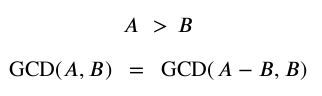

Stated simply, the GCD between two numbers 𝐴 and 𝐵 is the same as the GCD between their difference and the smaller of the two numbers. For example:


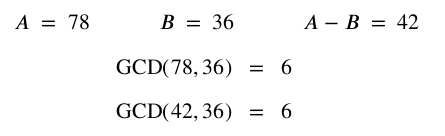

As we can see, both 78 and 42 share the same GCD with 36 . And if we consider which of these two problems we would prefer to tackle, obviously we would always choose the GCD between the two smaller numbers. Thus, based on this observation by Euclid, his algorithm describes a process by which we can
recursively keep taking the difference between numbers to reduce any GCD computation down to its minimum. To see this, suppose we were to take our
example above even further:

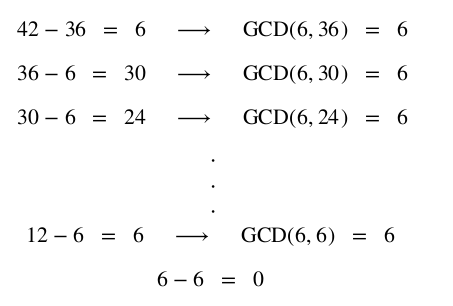

If we continuously follow Euclid's recursive method, we eventually arrive at the answer to our GCD problem when our subtractions lead us to 0. Note that in
all of the examples above we included the GCD computation at each step just to show that Euclid's observation always holds, but in actuality we never
compute any GCD's, only subtractions. Below is a simple code example which demonstrates Euclid's Algorithm in action:

In [63]:
A_i = 462
B_i = 70
#---------------------
gcd = False
GCD = 0
#=====================
A = A_i
B = B_i
while( gcd == False ):
  r = A - B
  print('A: ',A,'B: ',B,'r:',r)
  if( r == 0 ):
    gcd = True
    GCD = B
  else:
    if( r > B ):
      A = r
    else:
      A = B
      B = r
print('------------------------------------------------------\nGreatest Common Denominator between',A_i,'and',B_i,': ',GCD)

A:  462 B:  70 r: 392
A:  392 B:  70 r: 322
A:  322 B:  70 r: 252
A:  252 B:  70 r: 182
A:  182 B:  70 r: 112
A:  112 B:  70 r: 42
A:  70 B:  42 r: 28
A:  42 B:  28 r: 14
A:  28 B:  14 r: 14
A:  14 B:  14 r: 0
------------------------------------------------------
Greatest Common Denominator between 462 and 70 :  14


Once again, the significance of the GCD algorithm shown above is that we never have to find any factors of the two numbers A and B. Instead, our problem
is 100\% converted into arithmetic calculations, which are essentially what classical computers are designed to do faster than anything else! This is the power
behind Euclid's Algorithm, and similarly Shor's as we shall see. In essence, if we can cleverly convert any computationally difficult problem into one which
only requires GCD calculations, then we can expect enormous speedups.

Even though the code above arrives at the correct answer in relatively few steps, you've probably noticed in the two examples thus far that there is some
redundancy in Euclid's Algorithm, namely subtracting by the same value numerous times. For small numbers like the calculations above, these extra steps
aren't too costly, but once the numbers in question for the GCD computation become large enough, these redundant steps can become problematic. Thus, in
the spirit of optimal algorithms, we can improve upon Euclid's algorithm further by making use of a second observation:

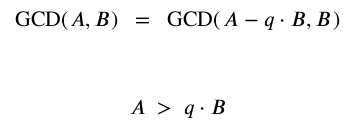

where q is an integer.


The two statements above are essentially guaranteeing the equivalency in GCDs when subtracting the same value numerous times consecutively in Euclid's
algorithm. 

Using our improved Euclid's Algorithm, we terminate the recursive process when we find a remainder of 0. The trick to this new method lies in finding remainders, which can easily be calculated using the modulo operator (%) in Python:

In [64]:
A = 123456
B = 789
print( A % B )

372


 To conclude, we now have a powerful tool for computing greatest common denominators very quickly, which doesn't require any knowledge about factors of
the two numbers used for the computation. We
don't even need to know the multiples q at each step! The only thing necessary for the recursive strategy to proceed are the remainders at each step, which
we just showed are easily obtained using the modulo operator. There's a very good reason why Euclid's Algorithm is still implemented today, over 2300 years
after it was first discovered, and hopefully our discussion has given sufficient insight into the computational power it can provide.

# **Overview of Shor's Algorithm**
***

Having now seen the context for why Shor's Algorithm is so significant, providing potential for cracking RSA encryption by converting the factoriziation of large
numbers into something solvable through GCDs, we're now ready to switch gears and begin our discussion of Shor's. Because there are so many moving
parts that make up Shor's, we will first look at all of the major steps of the algorithm, and then dissect components which require further explanation.
Presented below is the general layout of the algorithm, followed by some short code examples.

## **Step 1:  Pick 𝑁 and 𝑎**
The first step to Shor's Algorithm is picking N, the number we want to factor, and then a second number a, such that a is within: 2 ≤ 𝑎 ≤ 𝑁 − 2 . 𝑎 is typically chosen at random, as there is no real strategy behind picking an a that will ultimately lead to a successful factorization of N.

In [65]:
N = 35
a = int( random.randint(2,N-2) )
print('N: ',N)
print('a: ',a)

N:  35
a:  33


## **Step 2: Check GCD( 𝑁, 𝑎 )**

Step two is to compute greatest common denominator between 𝑁 and 𝑎. Doing so will yield one of two results:
1. The GCD(𝑁,𝑎) ≠ 1, in which case we have found a factor of 𝑁. This case is a rarity and a byproduct of pure luck. Recall from earlier that RSA encryption typically uses 𝑁 's on the order 100 - 1000 + digits, composed of two prime numbers 𝑝 and 𝑞 . Thus, the probability of picking one of the two factors at random is astronomically small.
2. The GCD(𝑁,𝑎) = 1
, which is the expected result. The primary purpose for computing GCD(𝑁,𝑎) here is to verify that 𝑎 is coprime with 𝑁, which is a necessary condition for proceeding to step 3.

In [66]:
def Euclids_Alg(a, b):
  '''
  Input: a (integer), b (integer)
  Computes the greatest common denominator between a and b using Euclid's Algorithm
  '''
  if(a>b):
    num1 = a
    num2 = b
  if(b>a):
    num1 = b
    num2 = a
  if(b==a):
    gcd = a
    r_old = 0
  r_new = int( num1%num2 )
  r_old = int( num2 )
  while(r_new!=0):
    r_old = r_new
    r_new = int( num1%num2 )
    num1 = num2
    num2 = r_new
  gcd = r_old
  return gcd

In [67]:
gcd = Euclids_Alg(N,a)
if(gcd > 1):
  print('a has a common factor with N ---> GCD: ',gcd)
if(gcd == 1):
  print('a has no common factor with N ---> GCD: ',gcd)

a has no common factor with N ---> GCD:  1


## ❗  **Step 3 :Find the period r**

This is the most important step in the algorithm. The reason this step is so important is because this is where our quantum
computer comes in, exponentially outperforming any classical method. Mathematically, the goal is to find the period of the following modular function:


$$𝑎^𝑥 = 𝑎^{𝑥+𝑟} (mod 𝑁)$$

The equation shown above is the heart of Shor's Algorithm, which we will discuss in great detail in the sections to come. Classically, this step is analogous to
the bottleneck of the two classical factoring algorithms, whereby a classical computer is forced to exhaustively search for the value . Using our quantum
computer however, we will be able to find exponentially faster, which in turn will allow us to complete our factoring problem.




In [68]:
def r_Finder(a, N):
  '''
  Input: a (integer), N (integer)
  Exhaustively computes the period r to the modulo power function a^x (mod N)
  '''
  value1 = a**1 % N
  r = 1
  value2 = 0
  while( (value1 != value2) or (r >1000) ):
    value2 = a**(int(1+r)) % N
    if( value1 != value2 ):
      r = r + 1
  return r

In [69]:
r = r_Finder(a,N)
print('period r: ',r)
print('\nVerify ',a,'^',r,' = 1 (mod ',N,'): ',(a**r)%N)

period r:  12

Verify  33 ^ 12  = 1 (mod  35 ):  1


## **Step 4:  Check requirements of r**

Once we have r, the algorithm still does not come with a 100\% guaranteed soluation rate. Step 4 is to quickly check that the 𝑟 we found in step 3 satisfies two conditions:

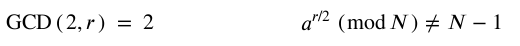

The condition on the left is simply saying that we require r to be an even number. Meanwhile, the condition on the right is a bit more complicated, and
requires further explanation from a later section. Mathematically, the condition is straightforward, but it's the reason why we require this condition which is
important. If we happen to get unlucky and find an r that doesn't meet these conditions, then we are forced to start over at step 1 and pick a new a. But if r 
does meet both conditions, then we continue on to the final step.

In [70]:
if( ((r)%2 == 0) and ( a**(int(r/2))%N != int(N-1) )):
  print('r is a good, proceed')
else:
  print('r is not good, start over')
  if((r)%2 != 0):
    print('r is odd: ',r)
  if(a**(int(r/2))%N == int(N-1)):
    print('a^(r/2) (mod N) = N-1')

r is a good, proceed


## **Step 5: Compute GCD($𝑁 , 𝑎^{𝑟/2} ± 1$ )**

Once a and r have met all of the conditions for steps 1 - 4, computing the GCD between 𝑁 and $𝑎^{𝑟/2}$ ± 1 will yield factors of 𝑁:

In [71]:
print('a^(r/2): ',int(a**(r/2.0)))
factor1 = Euclids_Alg(int(a**(r/2.0)+1),N)
factor2 = Euclids_Alg(int(a**(r/2.0)-1),N)
print('\nfactors of N: ',int(factor1),' ',int(factor2),'( N is',N,')')

a^(r/2):  1291467969

factors of N:  5   7 ( N is 35 )


Following all of the steps outlined above, you should find that the final cell of code correctly returns the factors of 5 and 7 with some probability. It is important
to note that the success of the algorithm is not strictly dependent on a single a, as there are many possible values that will complete the algorithm and lead to
the correct answer. To see this, try running the cell of code below several times.

In [91]:
N = 481
a = int( random.randint(2,N-2) )
print('a: ',a)
#-------------------------------#
if( Euclids_Alg(N,a) == 1 ):
  r = r_Finder(a,N)
  print( 'r: ',r )
  if( ((r)%2 == 0) and (a**(int(r/2))%N != int(N-1) )):
    print('\nfactors of N: ',int(Euclids_Alg(int(a**(r/2.0)+1),N)),' ',int(Euclids_Alg(int(a**(r/2.0)-1),N)),'( N is',N,')')
  else:
    if((r)%2 != 0):
      print('Condition Not Satisfied: r is odd: ',r)
    if(a**(int(r/2))%N == int(N-1)):
      print('Condition Not Satisfied: a^(r/2) (mod N) = N-1: ',a**(int(r/2))%N)
else:
  print('a has a GCD with N: ', Euclids_Alg(N,a))

a:  40
r:  18

factors of N:  37   13 ( N is 481 )


Having now seen Shor's Algorithm in its entirety, we will next backtrack and revisit a couple topics in need of further explanation.

## **Period Finding via Modulo Algebra**
***

As we pointed out in the outline above, step 3 is where our quantum computer comes in, making it the most important topic for this lesson. In demonstrating
this step however, we didn't provide any motivation for why we needed to compute the modulo period r, only that it was a necessary ingredient for the steps
to come (which did in fact solve the factorization problem of N = 35). So then, the need for period finding stems from the following equation:
$$
a^2 = 1 (mod N)
$$

Starting from the equation above, we can rearrange the terms to create a difference of squares (obeying modulo arithmetic rules):

$$
a^2 - 1 = 0 (mod N)
$$

which can be once again factored:

$$
(𝑎 + 1)(𝑎 − 1) = 0 (mod𝑁)
$$

The importance of the equation above is that it is telling us that 𝑁 divides (𝑎 + 1)(𝑎 − 1) evenly, which we know means that all of the factors in 𝑁 also
exist in $𝑎^2$ − 1. Now, based on our previous experience with the classical congruence of squares technique, you may suspect that a GCD is coming in the
next step, and you'd be correct. However, before computing the greatest common denominator, we must introduce one more condition on 𝑎:

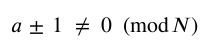

If we now look at the three equations above all together, what can we say about 𝑁 and 𝑎? The first two equations tell us the same story from earlier, 𝑁
divides the number $𝑎^2$ − 1, which has the factors (𝑎+1) and (𝑎 − 1) . But now, our new condition states that 𝑁 does not divide either 

(𝑎 + 1) or
(𝑎 − 1). So then, the only way for these seemingly contradictory conditions to be satisfied is if 𝑁 has two components: one that divides (𝑎 + 1) and one that divides (𝑎 − 1) . Or in other words, we can conclude that 𝑁 has at minimum two unique factors, one shared with each of the (𝑎 ± 1) terms. Thus, the
consequence of introducing this condition means that the GCD of 𝑁 with (𝑎 ± 1) will yield these two unique factors:

$$
GCD(𝑎 + 1,𝑁) = 𝑓1 
$$


$$
GCD(𝑎 − 1,𝑁) = 𝑓2
$$

The result here is more or less the same as before, whereby the use of GCD's leads us to $𝑓_1$ and $𝑓_2$ , the solution to our factorization problem of 𝑁 . The new
aspect here however is that our conditions will lead to some stronger restrictions on the factors we find:

$$
𝑓_1 ≠ 𝑓_2
$$

$$𝑓_1 \& 𝑓_2 ≠ 𝑎 ± 1
$$


The mathematical formalism outlined thus far will solve our factoring problem of 𝑁 , under one condition we find a correct value for 𝑎. Remember that 𝑁 is
some number given to us, which means that all of the conditions laid out above must be enforced through the 𝑎 we pick. If we were to turn to our classical
computers at this point, we know what they would suggest: perform a blind exhaustive search until we find an 𝑎 that meets all the criteria. However, we also
know that when 𝑁 starts to get large, this technique bottlenecks quite disastrously. For sufficiently large factoring problems, the time required for a classical
search to happen upon a correct value for 𝑎 becomes astronomically long. Thus, even using the best factoring techniques currently known, a classical
computer is stuck behind the wall of exhaustively searching through a near-infinite list. So then, the question becomes what will be our new technique for
finding an 𝑎 to solve our problem? Ironically, the answer is to just pick one at random!

As outlined in step 1, our new technique begins by picking a random value for 𝑎, such that it is between 2 and 𝑁 − 2. After picking our random 𝑎, we do a
quick GCD check to make sure that we didn't happen to pick a factor of 𝑁 by dumb luck (although the best case scenario would be to pick a factor I
suppose). After confirming that 𝑎 is indeed coprime with 𝑁 , our technique really begins with the following function:

$$
𝑎^𝑛 (mod𝑁)  
$$
$$
𝑛 ∈ {0,1,2,3,...}
$$

The equation above is a simple power function (mod 𝑁 ), but the key lies in the way these modulo power functions behave. Perhaps easier to show then
describe, run the cell of code below a couple of times to see the patterns emerging:

In [ ]:
N = 35
coprimes = [4,6,8,9,11,13,16]
a = coprimes[int( random.randint(0,len(coprimes)-1) )]
print('N = ',N,'a = ',a,'\n')
#-------------------------------
for i in np.arange(10):
  mod_N = a**int(i) % N
  print('a^',i,' (mod N): ',mod_N)

N =  35 a =  16 

a^ 0  (mod N):  1
a^ 1  (mod N):  16
a^ 2  (mod N):  11
a^ 3  (mod N):  1
a^ 4  (mod N):  16
a^ 5  (mod N):  11
a^ 6  (mod N):  1
a^ 7  (mod N):  16
a^ 8  (mod N):  11
a^ 9  (mod N):  1


The pattern we are looking for is the way in which power functions (mod N) repeat themselves. Specifically, because $a^0$ is always 1, the pattern is defined by the number of powers we must increase a by 1 until we get 1 again. For example, below is the first six powers of 8 (mod 35):

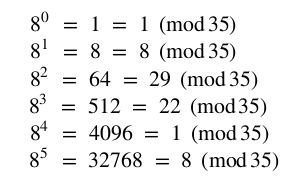

Between the cell of code above and this explicit example, hopefully it is clear that increasing the power of a number (mod N) will eventually lead to a
repeating pattern. Moreover, we can define the period of this pattern as the number of powers we must increase a by in order to get back to the same
number. Mathematically, we can express this repeating function as:

$$
𝑓(𝑎) = 𝑓(𝑎 + 𝑟)
$$

where the quantity r is the period. Now, remember that our primary goal is to find a value of a such that we satisfy the modulo equations above, which will in
turn lead us to the factorization of N. For now, we will assume that we have an efficient means for finding this period r  (which is the next topic in this lesson),
such that we can continue with our discussion of its use. With r in hand, assuming that we found an r which is even, the final trick comes from rewriting our
modulo equation of interest from earlier as follows:

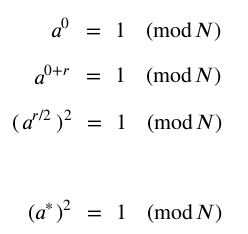

where $a^*$ = $a^{\frac{r}{2}}$

Now compare the result we just derived with the equation at the beginning of this section. Following from all of the steps already outlined, if our technique can
produce a value $a^*$, then it will lead us to the factorization of N via GCDs. Additionally, we've now revealed the motivation for our first of two conditions on r,
namely that we find a period which is even. As you can imagine, if we find an r which is odd, then the quantity $a^{\frac{r}{2}}$ is no longer guaranteed to result in an
integer, effectively nullifying our modulo math (with the special case exception that a is a perfect square). But the most important thing to note in the final step
shown above is that $a^{\frac{r}{2}}$ can come from numerous values of a. For example, suppose we had originally picked a = 8 and found the period r = 4:

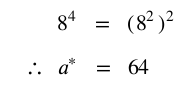

Since we found an 𝑟 which is even, we can use 𝑎∗ to compute the GCDs of ( 𝑎∗ + 1) and ( 𝑎∗ − 1) with 𝑁 :

$$
GCD(65,35) = 5
$$

$$
GCD(63,35) = 7
$$



As promised, we have gotten two unique factors of 𝑁 . And once again, the important concept to stress here is the fact that the 𝑎 we picked is nothing
special. As demonstrated by the cell of code accompanying step 5 earlier, over 50 \% of the possible 𝑎 values we could have picked would have successfully
lead us to an $𝑎^∗$ for factoring 𝑁 = 35. One way of thinking about this new approach is that we've exchanged a search for 𝑎 in favor of a search for 𝑟 . Before,
we knew that there was some value 𝑎 that would solve our problem, but had no means other than a blind search for finding it. Here, once again we must
search for an unknown value, 𝑟 , but the advantage is that hopefully it is an easier quantity to find (but as we shall see, is still classically difficult).

The mathematics laid out in this section really are the backbone of Shor's Algorithm, and aren't exactly easy to fully appreciate at first since most of us don't
work with modulo arithmetic too frequently. I encourage you to really take the time and process all of the different components which guarantee the success
of the factorization of N before moving on. For the remainder of this lesson we will be discussing the role of our quantum computer, namely for finding r, but
fundamentally we've now covered all of the topics regarding the factorization algorithm as a whole.

## **References**
***

1. P. W. Shor, "Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer", SIAM JSC. (1997)
2. R. Rivest, R. Shamir, L. Adleman, "A Method for Obtaining Digital Signatures and Public-Key Cryptosystems", Communications of the ACM. (1978)